<a href="https://colab.research.google.com/github/VeerVikramSingh/ML/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Problem Statement

The goal is to predict survival of passengers travelling in RMS Titanic using Logistic regression

The dataset consists of the information about people boarding the famous RMS Titanic. Various variables present in the dataset includes data of age, sex, fare, ticket etc.
The dataset comprises of 891 observations of 12 columns. Below is a table showing names of all the columns and their description.

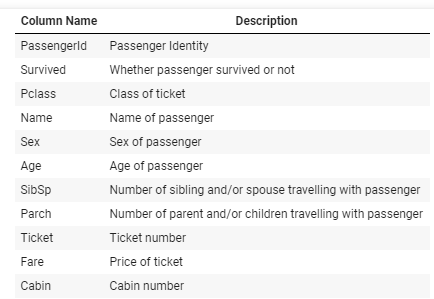

Importing Packages:

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from subprocess import check_output

EDA
distributon analysis
multi-variable analysis
correlation analysis
Pre-Model
## Feature selection 
## feature engineering 
## feature scaling 
## Featuer balancing 
## etc. 

Post-Model

Modle inference

model selection

model interepretation

In [2]:
titanic_data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Preprocessing the Data:

Dealing with missing values

Dropping/Replacing missing entries of Embarked.

Replacing missing values of Age and Fare with median values.

Dropping the column 'Cabin' as it has too many null values.

int64 -> Could be a Numerical Discreate or continus

Float -> Numerical Cont

Object -> Category

The goal is to always have single data_type

In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Missing Values problem:

- Drop Cabin (Drop if you have more than 40-60% Null/empty Vallues) 
-- Impute Age (Numerical Value, Discrete/Numerical) 
    -- Statistical Measure ; Mean or Median [We normalize the rows] 
        - Global Statistical View 
    -- Give empty values -0, -99, ; some nuemrical value not in data range [0.2 - 90], give all missing 200; [This will make your model treat these records differently.]  
    -- Model Driven Prediction for Missing Value
        - Local Statitical View 
          -- Linear Regresion 
          -- KNN
          -- Tree Based MEthods
    -- Local Median/Mean 
          - Based on Selected Columns 
          - Challange is- how many columns to select?
          - So, better is to run model and get prediction 
-- Impute Embarked (Categorical Non Ordinal /Ordinal ) 
    -- Statistical Measure; Mode ; High Frequent - Global 
    -- Give emopty values a new category -> "NA Cat","No Cat"
    -- Model Way ; Run Classification Model to predict empty category 
    -- Local Mode; Select columns to get most frequent

In [4]:
titanic_data["Embarked"].mode()

0    S
dtype: object

In [5]:
titanic_data["Embarked"].mode()[0]

'S'

In [0]:
titanic_data["Embarked"]=titanic_data["Embarked"].mode()[0]

In [0]:
titanic_data["Age"].fillna(titanic_data["Age"].median(),inplace=True)

In [0]:
titanic_data.drop("Cabin",axis=1,inplace=True)

In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [10]:
titanic_data["Embarked"].tail()

886    S
887    S
888    S
889    S
890    S
Name: Embarked, dtype: object

In [11]:
titanic_data=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Casestudy/titanic_train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
titanic_data["Embarked"]=titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0])
titanic_data["Age"].fillna(titanic_data["Age"].median(),inplace=True)
titanic_data.drop("Cabin",axis=1,inplace=True)


In [14]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Feature Engineering Part:

In [0]:
titanic_data["Family_Size"]=titanic_data["SibSp"]+titanic_data["Parch"]+1
titanic_data["Accompany"]=titanic_data["SibSp"]+titanic_data["Parch"]

In [0]:
titanic_data["Gender_Class"]=titanic_data.apply(lambda x:"Child" if x["Age"]<15 else x["Sex"],axis=1)

In [18]:
titanic_data[titanic_data["Age"]<5].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Accompany,Gender_Class
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,5,4,Child
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,3,2,Child
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q,6,5,Child
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,C,4,3,Child
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,S,6,5,Child


In [20]:
titanic_data[titanic_data["Age"]>15].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Accompany,Gender_Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,1,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,1,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,1,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,male


In [21]:
titanic_data.drop(["PassengerId","Sex","SibSp","Parch","Ticket"],axis=1)

,Survived,Pclass,Name,Age,Fare,Embarked,Family_Size,Accompany,Gender_Class
0,0,3,"Braund, Mr. Owen Harris",22.0,7.2500,S,2,1,male
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,71.2833,C,2,1,female
2,1,3,"Heikkinen, Miss. Laina",26.0,7.9250,S,1,0,female
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,53.1000,S,2,1,female
4,0,3,"Allen, Mr. William Henry",35.0,8.0500,S,1,0,male
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",27.0,13.0000,S,1,0,male
887,1,1,"Graham, Miss. Margaret Edith",19.0,30.0000,S,1,0,female
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,23.4500,S,4,3,female
889,1,1,"Behr, Mr. Karl Howell",26.0,30.0000,C,1,0,male


In [0]:
titanic=titanic_data.drop(["Name"],axis=1)

In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Sex             891 non-null object
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Embarked        891 non-null object
Family_Size     891 non-null int64
Accompany       891 non-null int64
Gender_Class    891 non-null object
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [24]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Name            891 non-null object
Sex             891 non-null object
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Embarked        891 non-null object
Family_Size     891 non-null int64
Accompany       891 non-null int64
Gender_Class    891 non-null object
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


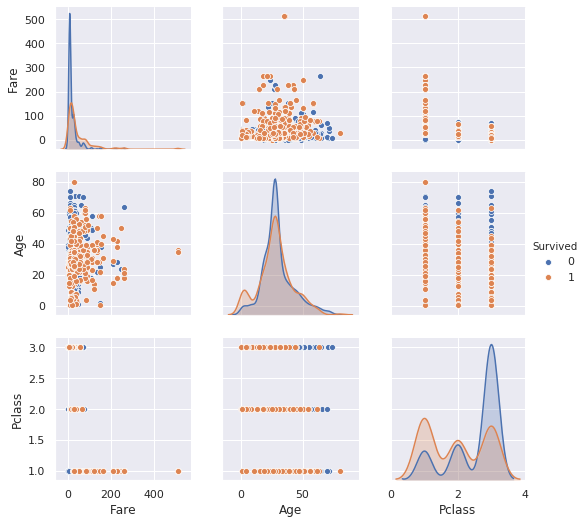

In [25]:
sns.pairplot(data=titanic_data[["Fare","Age","Pclass","Survived"]],vars=["Fare","Age","Pclass"],hue="Survived")

More people of Pclass 1 survived than died (First peak of red is higher than blue)

More people of Pclass 3 died than survived (Third peak of blue is higher than red)

More people of age group 20-40 died than survived.

Most of the people paying less fare died.

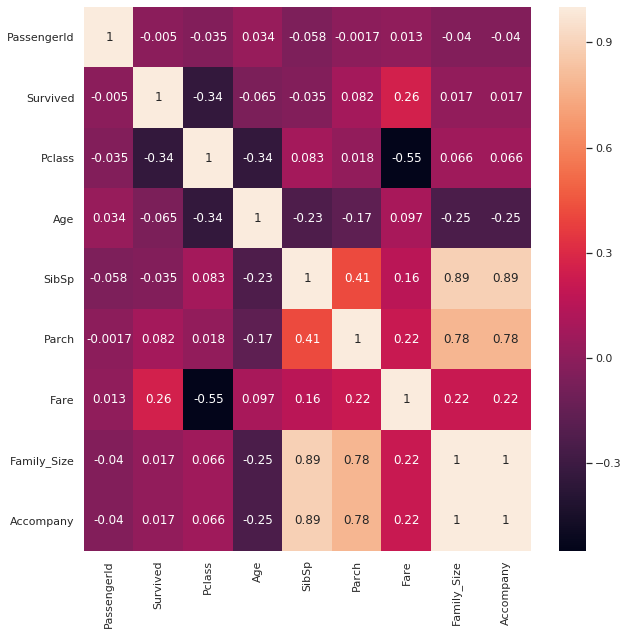

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(titanic_data.corr(),annot=True)

Age and Pclass are negatively corelated with Survived.

FamilySize is made from Parch and SibSb only therefore high positive corelation among them.

Fare and FamilySize are positively coorelated with Survived.

With high corelation we face redundancy issues.

In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId     891 non-null int64
Survived        891 non-null int64
Pclass          891 non-null int64
Sex             891 non-null object
Age             891 non-null float64
SibSp           891 non-null int64
Parch           891 non-null int64
Ticket          891 non-null object
Fare            891 non-null float64
Embarked        891 non-null object
Family_Size     891 non-null int64
Accompany       891 non-null int64
Gender_Class    891 non-null object
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [31]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Accompany,Gender_Class
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,2,1,male
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,2,1,female
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,female
3,4,1,1,female,35.0,1,0,113803,53.1000,S,2,1,female
4,5,0,3,male,35.0,0,0,373450,8.0500,S,1,0,male


In [0]:
titanic.drop(["PassengerId","Sex","Ticket","SibSp","Parch"],axis=1,inplace=True)

In [33]:
titanic.head()

,Survived,Pclass,Age,Fare,Embarked,Family_Size,Accompany,Gender_Class
0,0,3,22.0,7.2500,S,2,1,male
1,1,1,38.0,71.2833,C,2,1,female
2,1,3,26.0,7.9250,S,1,0,female
3,1,1,35.0,53.1000,S,2,1,female
4,0,3,35.0,8.0500,S,1,0,male


In [39]:
x=titanic[["Pclass","Age","Fare","Embarked","Family_Size","Accompany","Gender_Class"]]
x.head()

,Pclass,Age,Fare,Embarked,Family_Size,Accompany,Gender_Class
0,3,22.0,7.2500,S,2,1,male
1,1,38.0,71.2833,C,2,1,female
2,3,26.0,7.9250,S,1,0,female
3,1,35.0,53.1000,S,2,1,female
4,3,35.0,8.0500,S,1,0,male


In [40]:
y=titanic["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [41]:
titanic=pd.get_dummies(titanic,columns=["Gender_Class","Embarked"])
titanic.head()

,Survived,Pclass,Age,Fare,Family_Size,Accompany,Gender_Class_Child,Gender_Class_female,Gender_Class_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,1,0,0,1,0,0,1
1,1,1,38.0,71.2833,2,1,0,1,0,1,0,0
2,1,3,26.0,7.9250,1,0,0,1,0,0,0,1
3,1,1,35.0,53.1000,2,1,0,1,0,0,0,1
4,0,3,35.0,8.0500,1,0,0,0,1,0,0,1


In [42]:
x.head()

,Pclass,Age,Fare,Embarked,Family_Size,Accompany,Gender_Class
0,3,22.0,7.2500,S,2,1,male
1,1,38.0,71.2833,C,2,1,female
2,3,26.0,7.9250,S,1,0,female
3,1,35.0,53.1000,S,2,1,female
4,3,35.0,8.0500,S,1,0,male


In [44]:
x=titanic.loc[:,titanic.columns!="Survived"]
x.head()

,Pclass,Age,Fare,Family_Size,Accompany,Gender_Class_Child,Gender_Class_female,Gender_Class_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,7.2500,2,1,0,0,1,0,0,1
1,1,38.0,71.2833,2,1,0,1,0,1,0,0
2,3,26.0,7.9250,1,0,0,1,0,0,0,1
3,1,35.0,53.1000,2,1,0,1,0,0,0,1
4,3,35.0,8.0500,1,0,0,0,1,0,0,1


In [45]:
x=titanic.loc[:,titanic.columns!="Survived"]
x.head()

,Pclass,Age,Fare,Family_Size,Accompany,Gender_Class_Child,Gender_Class_female,Gender_Class_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,7.2500,2,1,0,0,1,0,0,1
1,1,38.0,71.2833,2,1,0,1,0,1,0,0
2,3,26.0,7.9250,1,0,0,1,0,0,0,1
3,1,35.0,53.1000,2,1,0,1,0,0,0,1
4,3,35.0,8.0500,1,0,0,0,1,0,0,1


In [46]:
y=titanic["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
def split(x,y):
  return train_test_split(x,y,test_size=0.20,random_state=1)

In [48]:
xtrain,xtest,ytrain,ytest=split(x,y)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(712, 11)
(179, 11)
(712,)
(179,)


In [49]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(xtrain,ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
ypred=log.predict(xtest)
ytest-ypred

862    0
223    0
84     0
680   -1
535    0
      ..
796    0
815    0
629    0
421    0
448    0
Name: Survived, Length: 179, dtype: int64

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
grid={"C":np.logspace(-3,3,7), 
      "penalty":["l1","l2"], 
      "tol":[0.01,0.001,0.0001]}# l1 lasso l2 ridge
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(xtrain,ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'tol': [0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [53]:
logreg_cv.best_estimator_

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.01, verbose=0,
                   warm_start=False)

In [54]:
logreg_cv.best_score_

0.8328651685393258

In [56]:
logreg.fit(xtrain,ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_test=logreg.predict(xtest)

In [0]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(ytest,y_pred_test)

0.8044692737430168

Model Evaluation using Confusion Matrix

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix=pd.DataFrame(confusion_matrix(ytest,y_pred_test))
print(confusion_matrix)

    0   1
0  95  11
1  24  49


In [66]:
confusion_matrix.index=[["Actual died","Actual Survived"]]
confusion_matrix.columns=[["Predicted died","Predicted Survived"]]
print(confusion_matrix)

                Predicted died Predicted Survived
Actual died                 95                 11
Actual Survived             24                 49


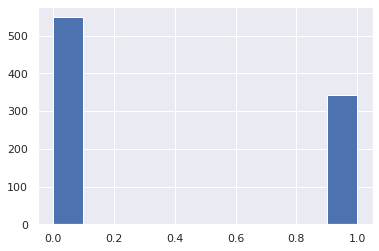

In [67]:
titanic["Survived"].hist()

Above we judge accuracy based on default threshold of 0.50 
now will try to vary threshold and will check impact on accuracy

In [0]:
y_pred1_test=np.where(logreg.predict_proba(xtest)[:,1]>0.75,1,0)

In [71]:
accuracy_score(ytest,y_pred1_test)

0.7374301675977654

will check with threshold of 0.25


In [0]:
y_pred_test2=np.where(logreg.predict_proba(xtest)[:,1]>0.25,1,0)

In [73]:
accuracy_score(ytest,y_pred_test2)

0.7541899441340782